<a href="https://colab.research.google.com/github/gilbe5jl/Smart-Traffic-Analyzer-YOLOv5-SORT/blob/main/Smart_Traffic_Analyzer_with_YOLOv5_%2B_SORT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Traffic Analyzer with YOLOv5 + SORT

This project demonstrates real-time object detection and tracking using YOLOv5 and the SORT tracking algorithm. The system processes video input to identify and track vehicles across frames, simulating the kind of analytics used in intelligent traffic surveillance systems.

### Core Technologies
- **YOLOv5** (You Only Look Once): Real-time object detection.
- **SORT** (Simple Online and Realtime Tracking): Lightweight tracking of detected objects.
- **OpenCV**: Frame-by-frame image processing.

## 1. Setup YOLOv5 and Dependencies

Start by cloning the official YOLOv5 repository and install its required dependencies. This includes PyTorch, OpenCV, and other utilities needed for object detection.

In [19]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -r requirements.txt

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


## 2. Load Pretrained YOLOv5 Model

load a pretrained YOLOv5 model using PyTorch. This model has been trained on the COCO dataset and it is capable of detecting 80 common object classes, including cars, trucks, and pedestrians.

In [20]:
import torch

# Load YOLOv5s (small, fast, good for real-time work)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-6-16 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## 3. Upload a Video for Detection

To test the model, we'll upload a short video file. You can record traffic footage yourself, or use any sample road/vehicle video. Keep the file short to avoid long processing times in Colab.

In [21]:
from google.colab import files
uploaded = files.upload()

import os

# Get uploaded filename
video_path = next(iter(uploaded))
print(f"Video uploaded: {video_path}")
# Print the location of where we uploaded the video
print(f"Video location: {os.getcwd()}/{video_path}")

Saving traffic_input.mp4 to traffic_input.mp4
Video uploaded: traffic_input.mp4
Video location: /content/yolov5/traffic_input.mp4


## 4. Run YOLOv5 on Video Frames

We'll now load the uploaded video, read it frame-by-frame using OpenCV, and run YOLOv5 detection on each frame. Detected objects will be annotated with bounding boxes and class labels.

In [22]:
import cv2
from pathlib import Path

# Open the video
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Output video writer
out_path = Path("yolo_output.mp4")
out = cv2.VideoWriter(str(out_path), cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

frame_num = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv5 inference
    results = model(frame)

    # Render results on frame
    annotated = results.render()[0]

    # Write annotated frame
    out.write(annotated)

    frame_num += 1
    if frame_num % 30 == 0:
        print(f"Processed frame {frame_num}/{frame_count}")

cap.release()
out.release()
print(f"Finished processing video. Saved as {out_path}")
# Print the full path of the output
print(f"Output path: {os.getcwd()}/{out_path}")

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 30/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 60/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 90/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 120/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 150/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 180/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 210/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 240/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 270/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 300/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 330/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 360/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 390/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 420/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 450/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 480/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 510/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 540/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 570/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 600/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 630/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 660/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 690/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 720/750


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Processed frame 750/750
Finished processing video. Saved as yolo_output.mp4
Output path: /content/yolov5/yolo_output.mp4


## 5. Run YOLOv8 + ByteTrack

Ultralytics’ YOLOv8 includes built-in tracking support

Step 1: Install Ultralytics YOLOv8

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [72]:
from ultralytics import YOLO

# Load model (same as before, but with new lib)
model = YOLO('yolov8n.pt')  # or yolov8s.pt for better accuracy
video_path="/content/yolov5/traffic_input.mp4"
# Run tracking on uploaded video
track_output = model.track(source=video_path, save=True, tracker="bytetrack.yaml")


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/750) /content/yolov5/traffic_input.mp4: 384x640 1 person, 2 cars, 153.5ms
video 1/1 (frame 2/750) /content/yolov5/traffic_input.mp4: 384x640 1 person, 2 cars, 146.3ms
video 1/1 (frame 3/750) /content/yolov5/traffic_input.mp4: 384x640 1 person, 2 cars, 139.1ms
video 1/1 (frame 4/750) /content/yolov5/traffic_input.mp4: 384x640 1 person, 2 cars, 144.2ms
video 1/1 (frame 5/750) /content/yolov5/traffic_input.mp4: 384x640 1 person, 2 cars,

In [71]:
!ls -lh /content/runs/detect/track

total 26M
-rw-r--r-- 1 root root 26M Jun 16 19:26 traffic_input.avi


In [76]:
!ls /content/runs/detect/track2

traffic_input.avi


#Download the result file

In [77]:
from google.colab import files
files.download("/content/runs/detect/track2/traffic_input.avi")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Object Density Heatmap


In [78]:
import cv2
import numpy as np
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # already downloaded

video_path = "/content/yolov5/traffic_input.mp4"  # input path
cap = cv2.VideoCapture(video_path)

all_centers = []
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, verbose=False)[0]
    boxes = results.boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]

    for x1, y1, x2, y2 in boxes:
        cx = int((x1 + x2) / 2)
        cy = int((y1 + y2) / 2)
        all_centers.append((cx, cy))

    frame_count += 1

cap.release()
print(f"✅ Processed {frame_count} frames. Collected {len(all_centers)} object points.")

✅ Processed 750 frames. Collected 2750 object points.


#Generate Plot and Heatmap

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np

# Reload width/height
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
cap.release()

print(f"Video resolution: {width}x{height}")
print(f"Total detections: {len(all_centers)}")

# Unpack points
if len(all_centers) == 0:
    print("⚠️ No detection points found.")
else:
    xs, ys = zip(*all_centers)

    # Create histogram with 64x48 bins
    heatmap, xedges, yedges = np.histogram2d(ys, xs, bins=[48, 64], range=[[0, height], [0, width]])

    # Debug: check range of heatmap values
    print(f"Heatmap max intensity: {heatmap.max()}")
    print(f"Heatmap min intensity: {heatmap.min()}")

    # Plot
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap, cmap="hot", cbar=True)
    plt.title("Object Density Heatmap")
    plt.xlabel("Horizontal Position (Binned)")
    plt.ylabel("Vertical Position (Binned)")
    plt.gca().invert_yaxis()
    plt.show()

Video resolution: 640x360
Total detections: 2750
Heatmap max intensity: 750.0
Heatmap min intensity: 0.0


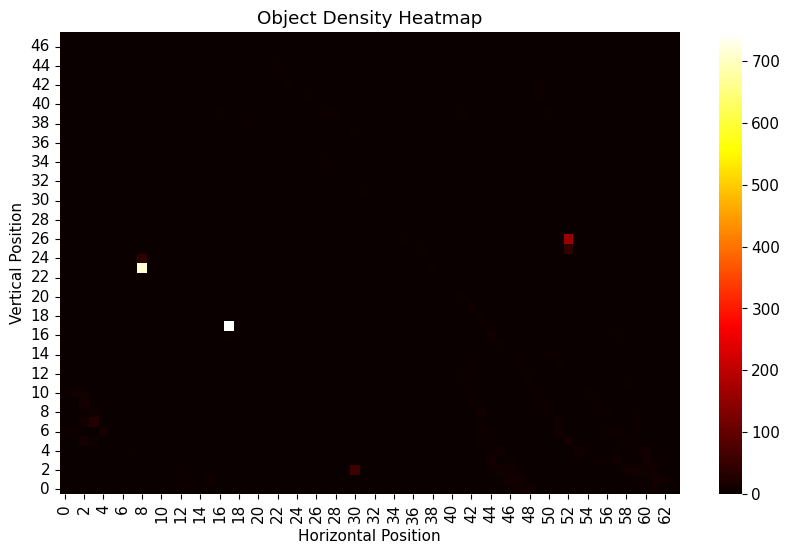

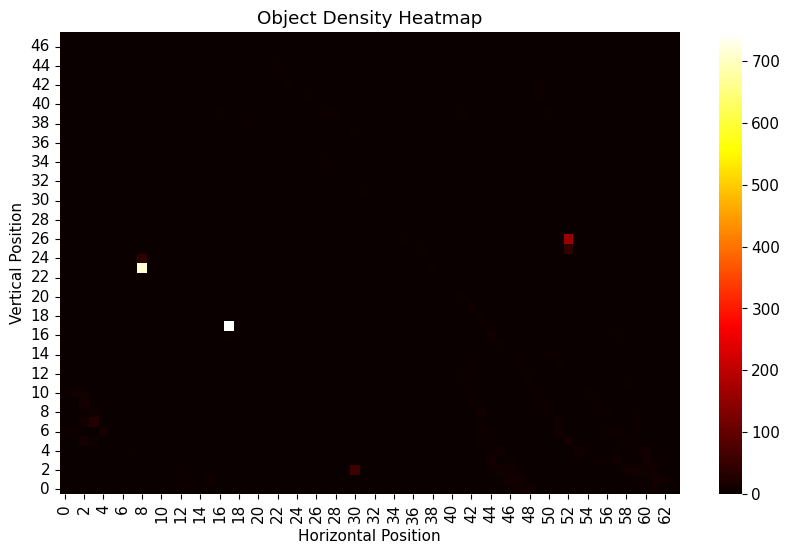

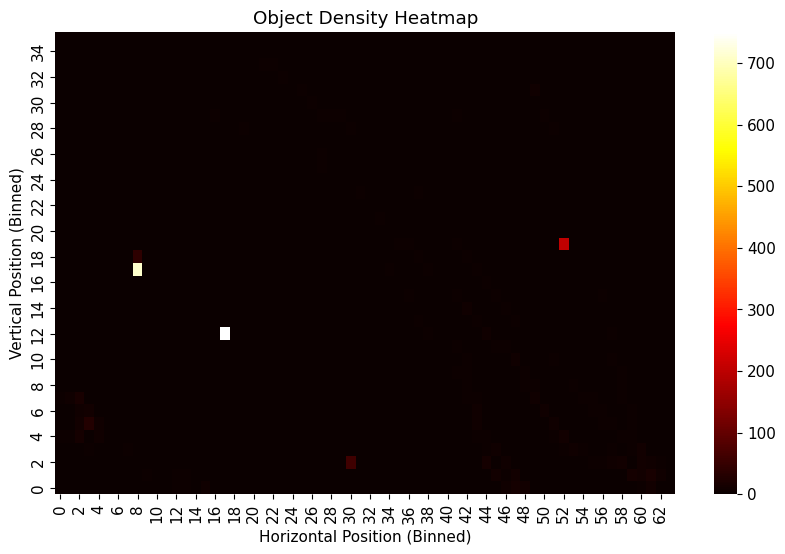

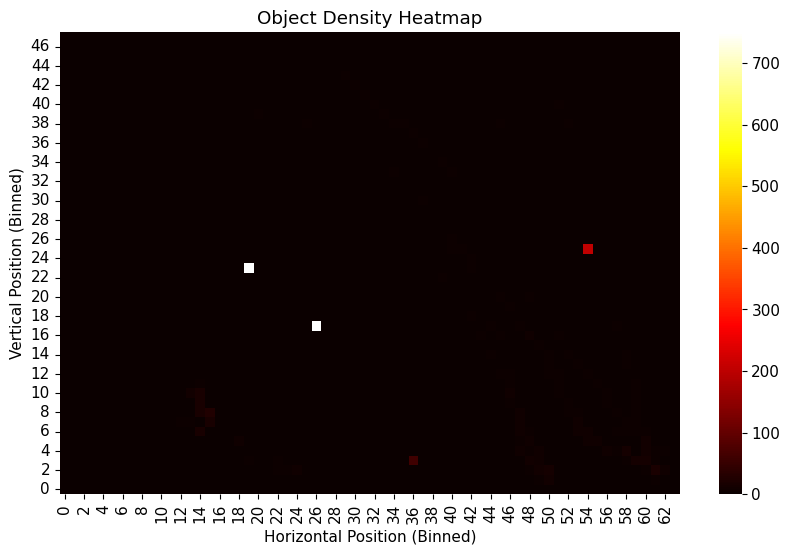

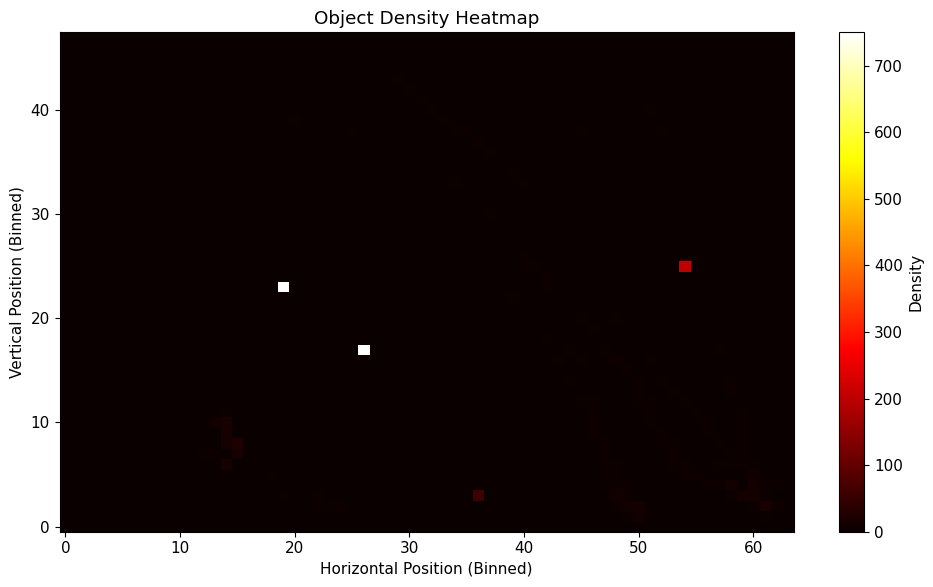

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Force Matplotlib backend for inline rendering
%matplotlib inline

# Rebuild the heatmap array in case of stale values
heatmap, xedges, yedges = np.histogram2d(ys, xs, bins=[48, 64], range=[[0, height], [0, width]])

# Display with plain Matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(heatmap, cmap='hot', interpolation='nearest', origin='lower', aspect='auto')
plt.title("Object Density Heatmap")
plt.xlabel("Horizontal Position (Binned)")
plt.ylabel("Vertical Position (Binned)")
plt.colorbar(label="Density")
plt.tight_layout()
plt.show()

#Overlay Heatmap on a Video Frame

##Extract a Sample Frame

In [107]:
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)

ret, frame = cap.read()
cap.release()

if not ret:
    raise RuntimeError("Failed to extract frame.")


##Picks the middle frame of the video
	•	Builds a 2D histogram from detections
	•	Smooths it for visual clarity
	•	Applies a JET colormap
	•	Blends it visibly with the frame
	•	Displays and saves it


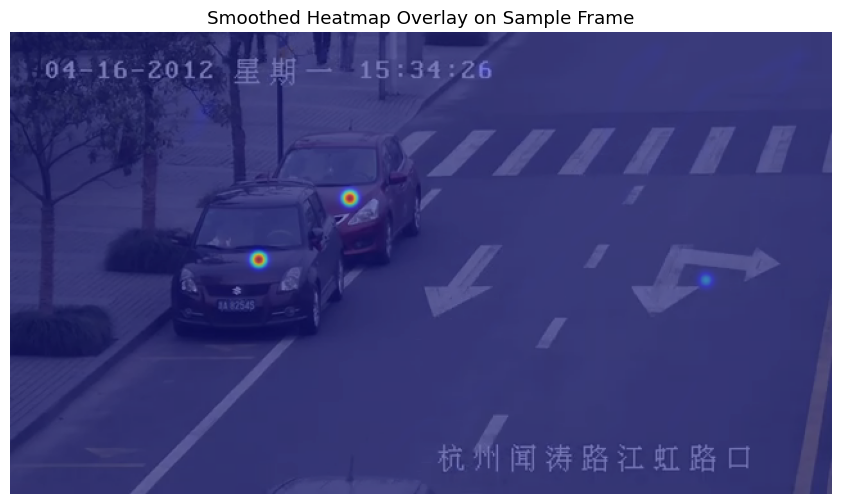

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === Load video and grab middle frame ===
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames // 2)
ret, frame = cap.read()
cap.release()

assert ret, "❌ Failed to extract frame."

# === Build heatmap from stored centers ===
heatmap_raw, _, _ = np.histogram2d(ys, xs, bins=[height, width], range=[[0, height], [0, width]])

# === Blur the heatmap to spread density visually ===
heatmap_blurred = cv2.GaussianBlur(heatmap_raw, (25, 25), 0)

# === Normalize to 0–255 and convert to color ===
heatmap_norm = cv2.normalize(heatmap_blurred, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
heatmap_color = cv2.applyColorMap(heatmap_norm, cv2.COLORMAP_JET)

# === Blend heatmap with video frame ===
overlay = cv2.addWeighted(frame, 0.5, heatmap_color, 0.5, 0)

# === Display result ===
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Smoothed Heatmap Overlay on Sample Frame")
plt.show()

# === Save for download or GitHub ===
cv2.imwrite("heatmap_overlay_blurred.png", overlay)
from google.colab import files
files.download("heatmap_overlay_blurred.png")

#Live Heatmap Overlay on Every Frame

In [109]:
import cv2
import numpy as np
from ultralytics import YOLO
from pathlib import Path

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Video input/output setup
video_path = "/content/yolov5/traffic_input.mp4"
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Output video writer
output_path = "/content/heatmap_video.mp4"
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# Initialize heatmap accumulator
accumulator = np.zeros((height, width), dtype=np.float32)

frame_num = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run detection
    results = model(frame, verbose=False)[0]
    boxes = results.boxes.xyxy.cpu().numpy() if results.boxes else []

    # Add box centers to accumulator
    for x1, y1, x2, y2 in boxes:
        cx = int((x1 + x2) / 2)
        cy = int((y1 + y2) / 2)
        if 0 <= cx < width and 0 <= cy < height:
            accumulator[cy, cx] += 1  # note: (row, col) = (y, x)

    # Blur and normalize heatmap
    blurred = cv2.GaussianBlur(accumulator, (51, 51), 0)
    norm = cv2.normalize(blurred, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    heatmap = cv2.applyColorMap(norm, cv2.COLORMAP_JET)

    # Blend with original frame
    blended = cv2.addWeighted(frame, 0.5, heatmap, 0.5, 0)

    out.write(blended)

    frame_num += 1
    if frame_num % 50 == 0:
        print(f"Processed {frame_num}/{total_frames} frames...")

cap.release()
out.release()
print(f"✅ Video saved to {output_path}")

from google.colab import files
files.download("/content/heatmap_video.mp4")

Processed 50/750 frames...
Processed 100/750 frames...
Processed 150/750 frames...
Processed 200/750 frames...
Processed 250/750 frames...
Processed 300/750 frames...
Processed 350/750 frames...
Processed 400/750 frames...
Processed 450/750 frames...
Processed 500/750 frames...
Processed 550/750 frames...
Processed 600/750 frames...
Processed 650/750 frames...
Processed 700/750 frames...
Processed 750/750 frames...
✅ Video saved to /content/heatmap_video.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Side-by-Side Video with Heatmap + Boxes

In [110]:
import cv2
import numpy as np
from ultralytics import YOLO

# Reload video
video_path = "/content/yolov5/traffic_input.mp4"
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Output video writer (double width for side-by-side)
output_path = "/content/side_by_side_heatmap.mp4"
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width * 2, height))

# Load model
model = YOLO("yolov8n.pt")

# Heatmap accumulator
accumulator = np.zeros((height, width), dtype=np.float32)

frame_num = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame, verbose=False)[0]
    boxes = results.boxes.xyxy.cpu().numpy() if results.boxes else []
    class_ids = results.boxes.cls.cpu().numpy() if results.boxes else []

    # === Original frame with detections ===
    frame_detected = frame.copy()
    for (x1, y1, x2, y2), cls in zip(boxes, class_ids):
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        label = model.names[int(cls)]
        cv2.rectangle(frame_detected, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame_detected, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # === Update heatmap ===
    for x1, y1, x2, y2 in boxes:
        cx = int((x1 + x2) / 2)
        cy = int((y1 + y2) / 2)
        if 0 <= cx < width and 0 <= cy < height:
            accumulator[cy, cx] += 1

    blurred = cv2.GaussianBlur(accumulator, (51, 51), 0)
    norm = cv2.normalize(blurred, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    heatmap = cv2.applyColorMap(norm, cv2.COLORMAP_JET)

    # === Heatmap blended + detection boxes ===
    frame_heatmap = cv2.addWeighted(frame.copy(), 0.5, heatmap, 0.5, 0)
    for (x1, y1, x2, y2), cls in zip(boxes, class_ids):
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        label = model.names[int(cls)]
        cv2.rectangle(frame_heatmap, (x1, y1), (x2, y2), (255, 255, 255), 2)
        cv2.putText(frame_heatmap, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # === Combine side by side ===
    side_by_side = np.hstack((frame_detected, frame_heatmap))
    out.write(side_by_side)

    frame_num += 1
    if frame_num % 50 == 0:
        print(f"Processed {frame_num}/{total_frames} frames...")

cap.release()
out.release()
print(f"✅ Side-by-side video saved to: {output_path}")

from google.colab import files
files.download("/content/side_by_side_heatmap.mp4")

Processed 50/750 frames...
Processed 100/750 frames...
Processed 150/750 frames...
Processed 200/750 frames...
Processed 250/750 frames...
Processed 300/750 frames...
Processed 350/750 frames...
Processed 400/750 frames...
Processed 450/750 frames...
Processed 500/750 frames...
Processed 550/750 frames...
Processed 600/750 frames...
Processed 650/750 frames...
Processed 700/750 frames...
Processed 750/750 frames...
✅ Side-by-side video saved to: /content/side_by_side_heatmap.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Live Object Count Graph Overlay in Video
This version uses matplotlib to render a graph → convert to an image → overlay with OpenCV.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from io import BytesIO
from PIL import Image

# === Setup ===
video_path = "/content/yolov5/traffic_input.mp4"
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

out_path = "/content/yolo_counts_overlay.mp4"
out = cv2.VideoWriter(out_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

model = YOLO("yolov8n.pt")
class_names = model.names

# === Frame loop ===
frame_num = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run detection
    results = model(frame, verbose=False)[0]
    cls_ids = results.boxes.cls.cpu().numpy() if results.boxes else []

    # Count objects by class
    counts = {class_names[int(i)]: cls_ids.tolist().count(i) for i in set(cls_ids)}

    # === Render bar chart with matplotlib ===
    fig, ax = plt.subplots(figsize=(3, 2), dpi=100)
    ax.bar(counts.keys(), counts.values(), color='skyblue')
    ax.set_title("Live Object Count")
    ax.set_ylim(0, max(5, max(counts.values(), default=1)))
    ax.set_ylabel("Count")
    ax.set_xticklabels(counts.keys(), rotation=45, ha='right', fontsize=8)
    plt.tight_layout()

    # Convert plot to image
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    graph_img = Image.open(buf)
    graph_cv = cv2.cvtColor(np.array(graph_img), cv2.COLOR_RGBA2BGR)

    # Resize and overlay onto frame
    gh, gw = graph_cv.shape[:2]
    frame[10:10+gh, 10:10+gw] = graph_cv  # top-left corner

    out.write(frame)
    frame_num += 1

    if frame_num % 50 == 0:
        print(f"Processed {frame_num} frames...")

cap.release()
out.release()
print(f"✅ Video saved with live graph overlay: {out_path}")

from google.colab import files
files.download("/content/yolo_counts_overlay.mp4")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 110MB/s]


✅ Video saved with live graph overlay: /content/yolo_counts_overlay.mp4


FileNotFoundError: Cannot find file: /content/yolo_counts_overlay.mp4